In [95]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [96]:
df['job_posted_month']=df.job_posted_date.dt.strftime('%B')
df['job_posted_year']=df.job_posted_date.dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [97]:
df_usa = df[df['job_country']=='United States']

In [98]:
df_US_pivot = df_usa.pivot_table(index=['job_posted_year','job_posted_month'],columns='job_title_short',aggfunc='size')
df_US_pivot

job_title_short                   Business Analyst  Cloud Engineer  \
job_posted_year job_posted_month                                     
2023            April                          565              40   
                August                         903              39   
                December                       648              40   
                February                       447              24   
                January                        527              36   
                July                           581              39   
                June                           446              32   
                March                          438              19   
                May                            279              20   
                November                       719              36   
                October                        932              48   
                September                      897              50   

job_title_short                   Data Analyst  Data Engineer  Data Scientist  \
job_posted_year job_posted_month                                                
2023            April                     6049           2801            4867   
                August                    6634           3269            6318   
                December                  3979           2641            3472   
                February                  6124           3060            4956   
                January                   8494           2655            6915   
                July                      5201           2570            4876   
                June                      5683           2893            4645   
                March                     6218           3183            4779   
                May                       4993           2976            4377   
                November                  4531           2793            4175   
                October                   5271           3015            4882   
                September                 4639           3224            4568   

job_title_short                   Machine Learning Engineer  \
job_posted_year job_posted_month                              
2023            April                                    51   
                August                                   68   
                December                                119   
                February                                 56   
                January                                  60   
                July                                     65   
                June                                     48   
                March                                    59   
                May                                      49   
                November                                132   
                October                                 101   
                September                               113   

job_title_short                   Senior Data Analyst  Senior Data Engineer  \
job_posted_year job_posted_month                                              
2023            April                            1025                   781   
                August                           1186                   903   
                December                          601                   689   
                February                         1258                   878   
                January                          1544                   773   
                July                              883                   747   
                June                             1009                   812   
                March                            1114                   829   
                May                               839                   746   
                November                          656                   684   
                October                           871

In [99]:
df_US_pivot.reset_index(inplace = True)

In [100]:
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'],format='%B').dt.month

In [101]:
df_US_pivot.sort_values('month_no',inplace=True)

In [102]:
df_US_pivot.set_index('job_posted_month', inplace=True)

In [119]:
top_job = df_usa['job_title_short'].value_counts().head(3).index.tolist()

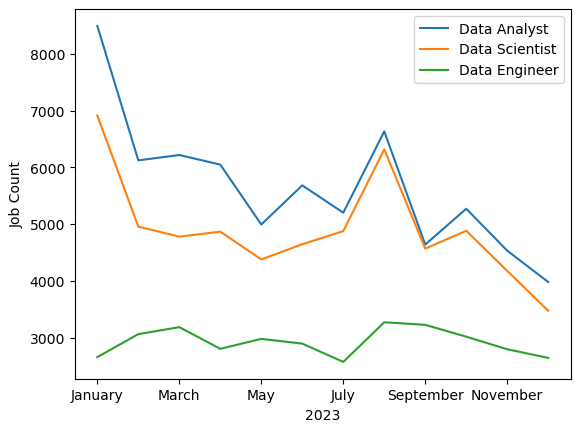

In [122]:
df_US_pivot[top_job].plot(kind='line')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()